<a href="https://colab.research.google.com/github/jessy-suresh/PRACTICE-QUESTIONS-MACHINE-LEARNING/blob/main/dataset_visualization_expt_qno_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 DEMO 1: Built-in Datasets
🚀 DATASET EXPLORER DEMONSTRATION

1. Loading Iris dataset from scikit-learn...
✅ Successfully loaded iris dataset
📊 COMPREHENSIVE DATASET REPORT
📊 DATASET BASIC INFORMATION
📁 Source: iris
📐 Shape: (150, 5) (rows, columns)
🧮 Memory Usage: 0.01 MB
📊 Columns: 5

📋 COLUMNS AND DATA TYPES:
  sepal length (cm): float64
  sepal width (cm): float64
  petal length (cm): float64
  petal width (cm): float64
  target: int64

❓ NULL VALUES:
  ✅ No null values found

📈 STATISTICAL SUMMARY

🔢 NUMERICAL FEATURES SUMMARY:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%   

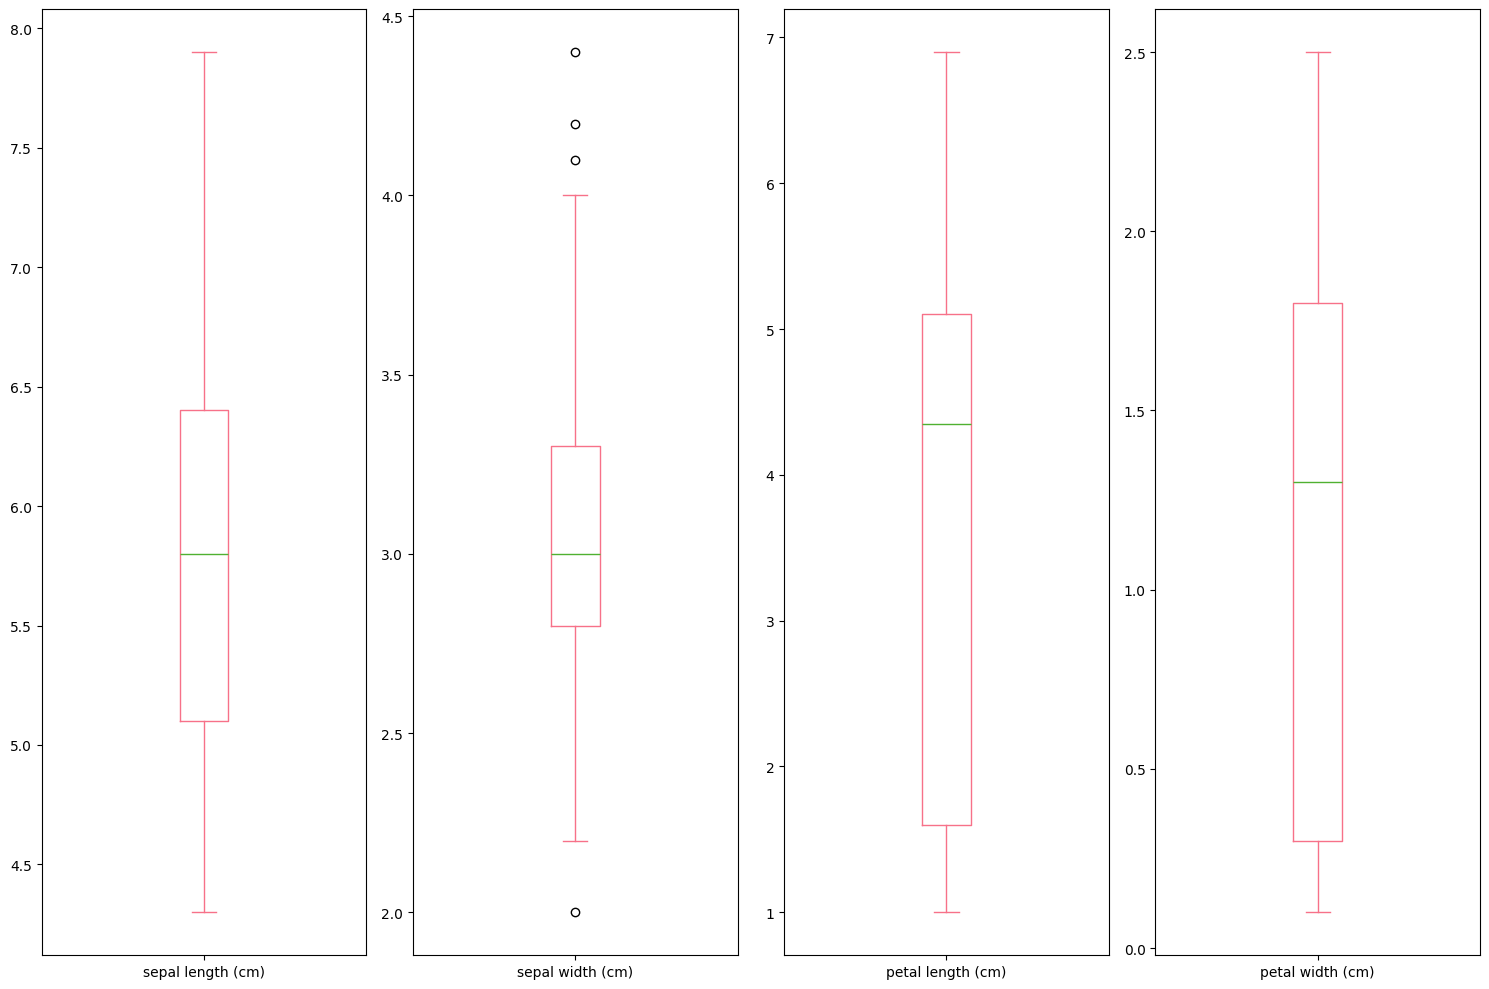

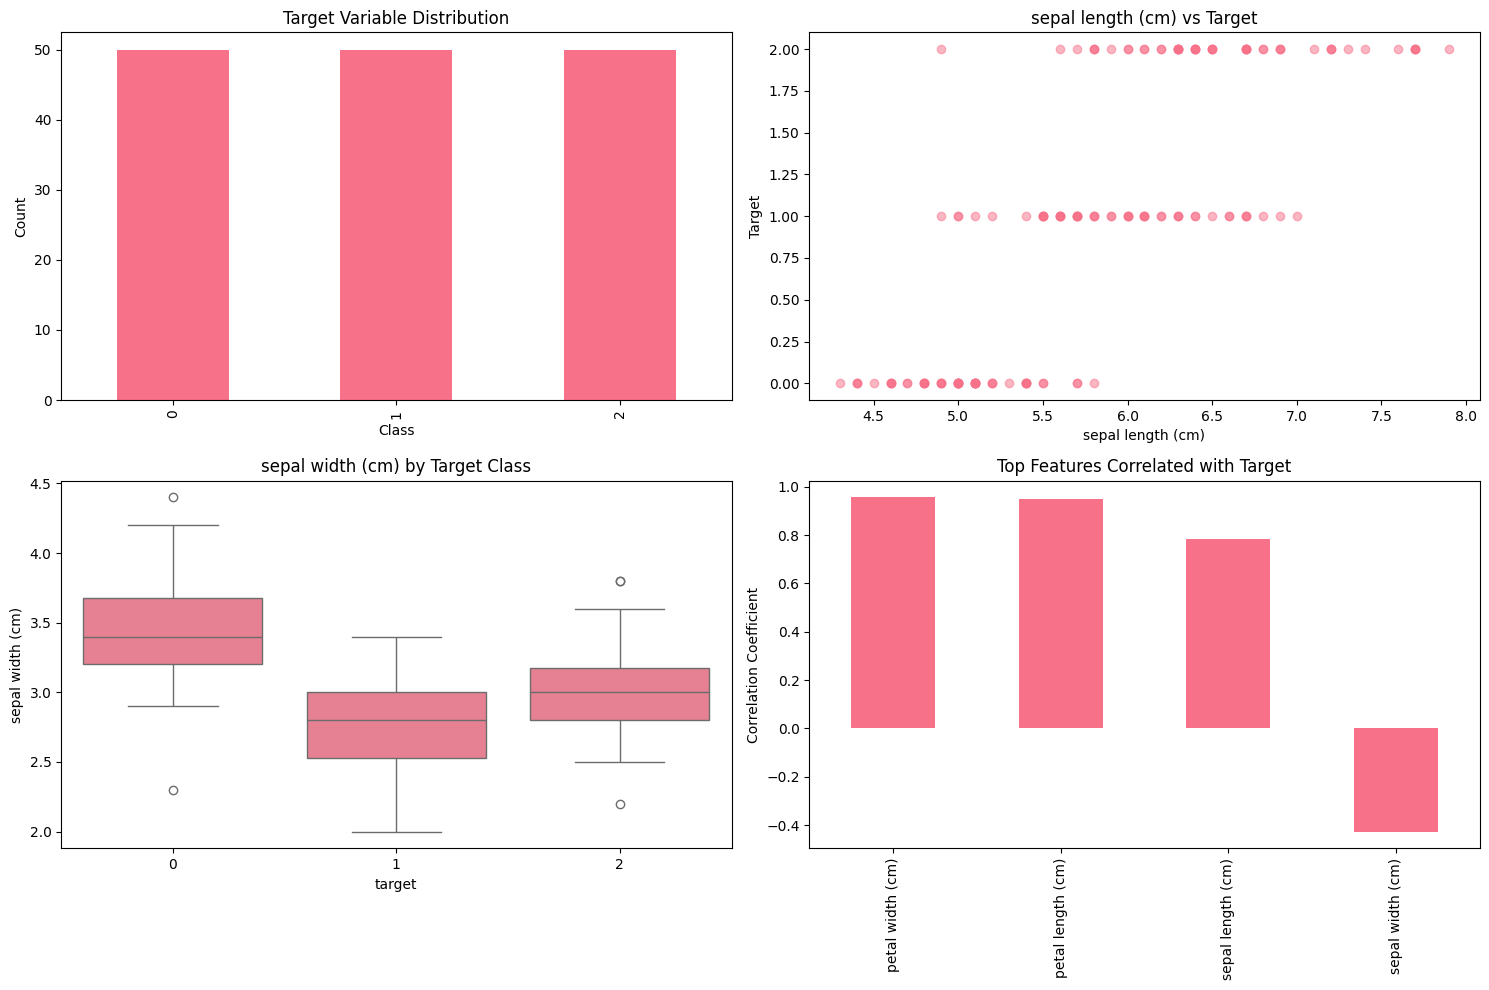


📄 FIRST 3 ROWS:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0  

📄 LAST 3 ROWS:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
147       2  
148       2  
149       2  


🎯 DEMO 2: Multiple Sample Datasets

📂 IRIS FLOWERS CLASSIFICATION
✅ Successfully loaded iris dataset
📊 DATASET BASIC INFORMATION
📁 Source: iris
📐 Shape: (150, 5) (rows, columns)
🧮 Memory Usage: 0.01 MB
📊 Columns: 5

📋 C

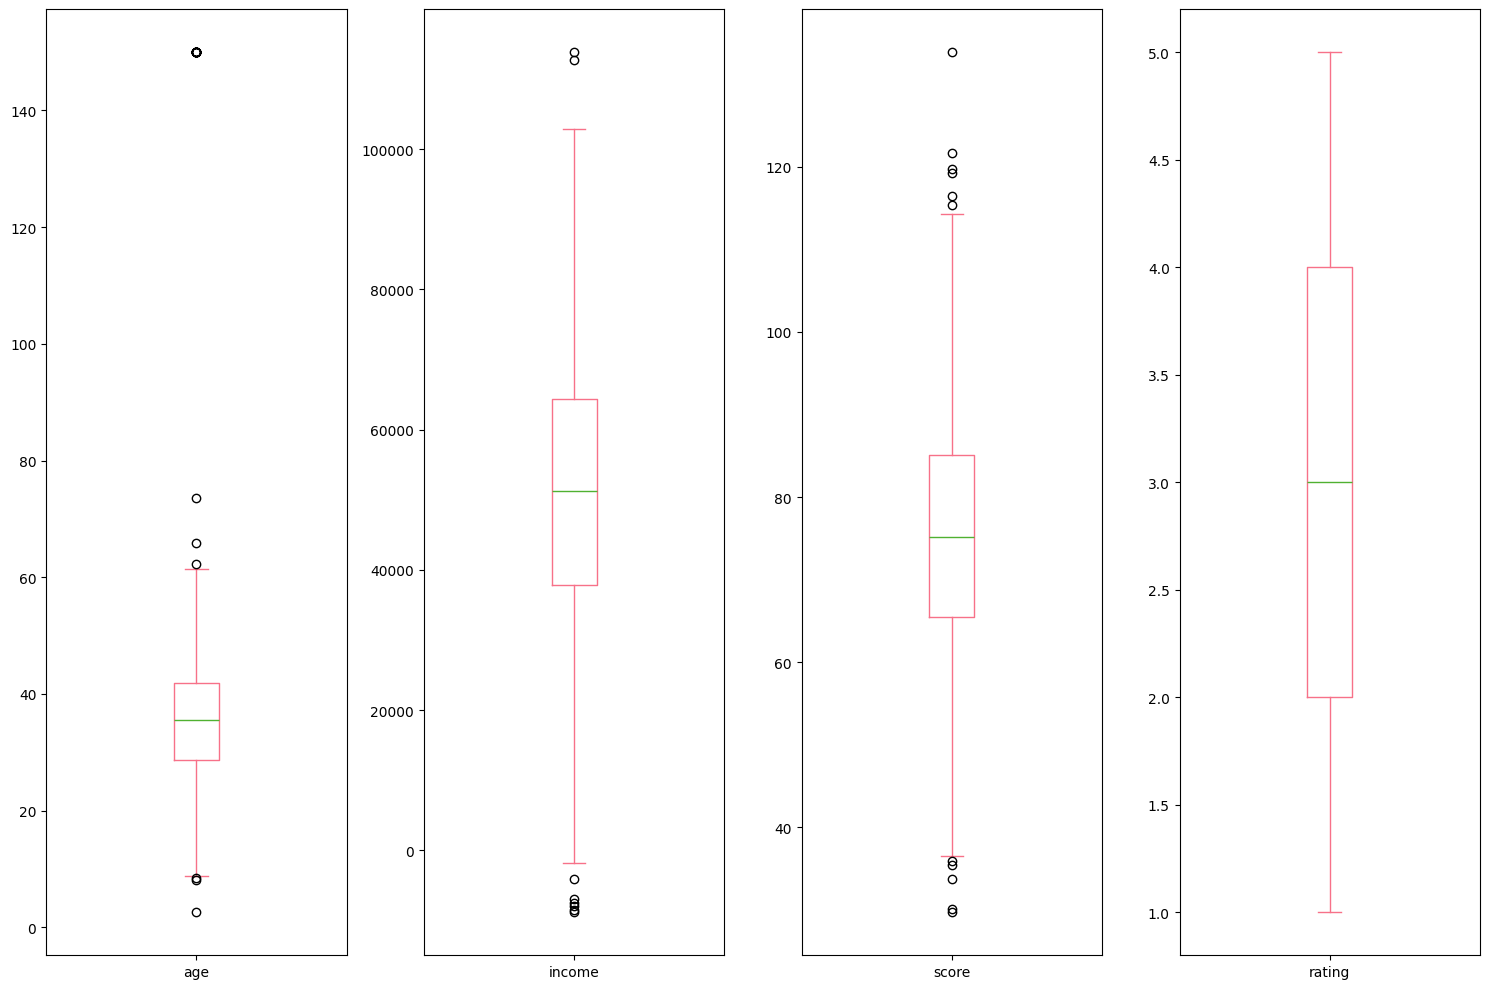

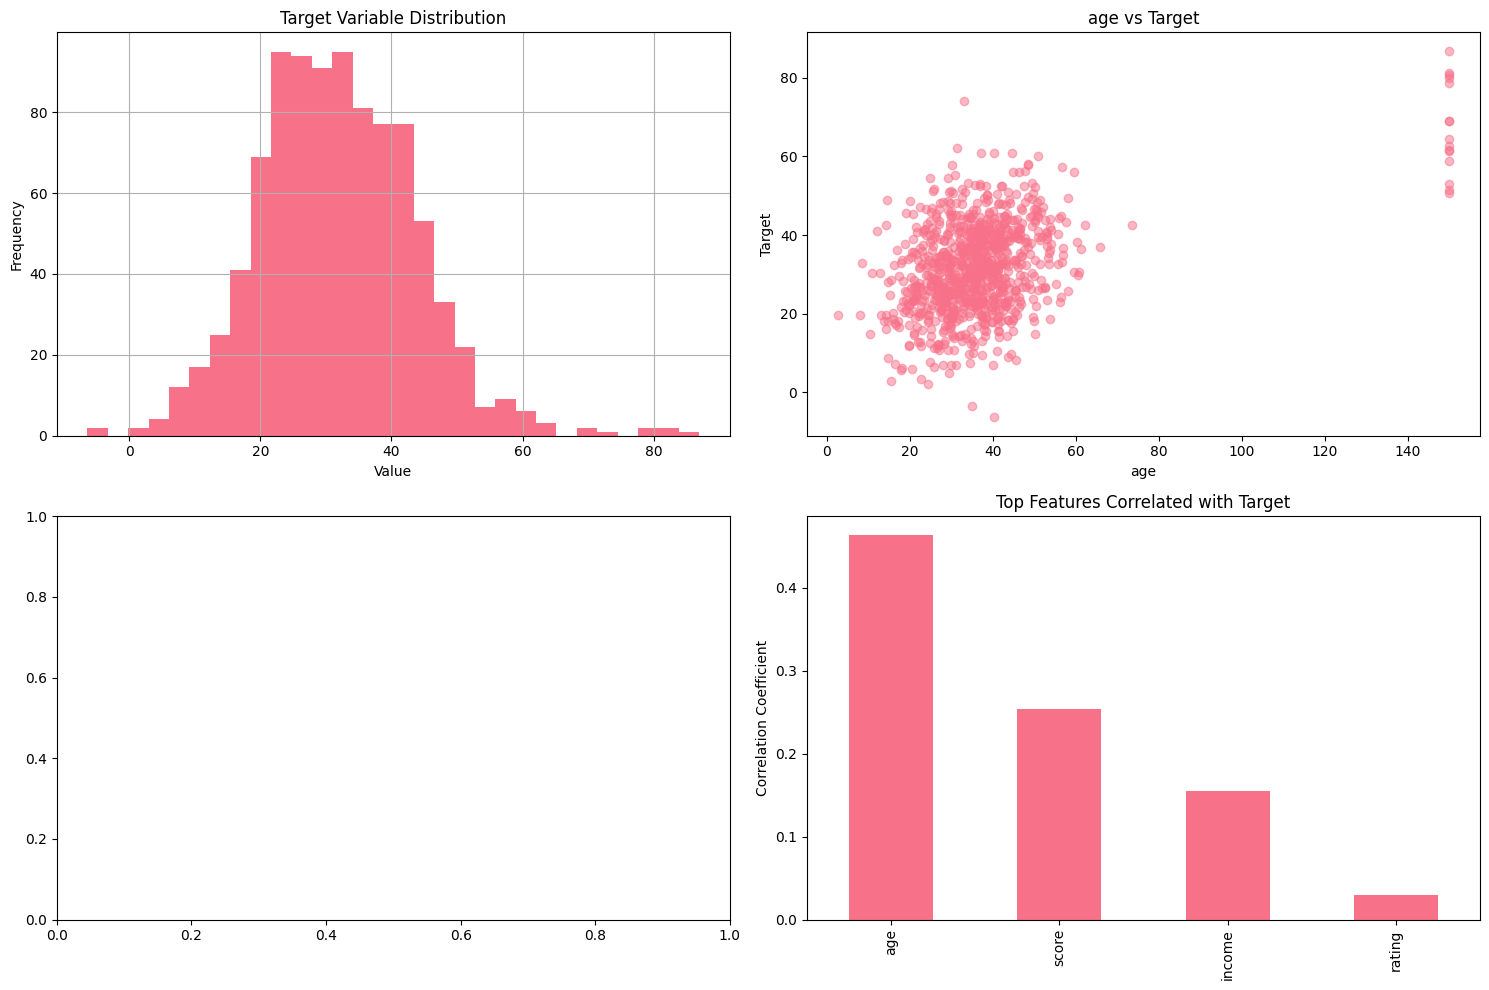


✅ ALL DEMONSTRATIONS COMPLETED SUCCESSFULLY!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing, load_diabetes, load_wine, load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

class DatasetExplorer:
    """Comprehensive dataset loading and exploration tool"""

    def __init__(self):
        self.dataset = None
        self.df = None
        self.dataset_info = {}

    def load_sklearn_dataset(self, dataset_name):
        """Load dataset from scikit-learn"""
        dataset_map = {
            'iris': load_iris,
            'california_housing': fetch_california_housing,
            'diabetes': load_diabetes,
            'wine': load_wine,
            'breast_cancer': load_breast_cancer
        }

        if dataset_name not in dataset_map:
            raise ValueError(f"Dataset {dataset_name} not available. Choose from: {list(dataset_map.keys())}")

        self.dataset = dataset_map[dataset_name]()
        self.df = pd.DataFrame(self.dataset.data, columns=self.dataset.feature_names)

        # Add target column if available
        if hasattr(self.dataset, 'target'):
            self.df['target'] = self.dataset.target

        self._store_dataset_info(dataset_name)
        print(f"✅ Successfully loaded {dataset_name} dataset")
        return self.df

    def load_csv(self, file_path, **kwargs):
        """Load dataset from CSV file"""
        try:
            self.df = pd.read_csv(file_path, **kwargs)
            self._store_dataset_info(f"CSV: {file_path}")
            print(f"✅ Successfully loaded CSV from {file_path}")
            return self.df
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            return None

    def load_excel(self, file_path, **kwargs):
        """Load dataset from Excel file"""
        try:
            self.df = pd.read_excel(file_path, **kwargs)
            self._store_dataset_info(f"Excel: {file_path}")
            print(f"✅ Successfully loaded Excel from {file_path}")
            return self.df
        except Exception as e:
            print(f"❌ Error loading Excel: {e}")
            return None

    def load_from_url(self, url, **kwargs):
        """Load dataset from URL"""
        try:
            self.df = pd.read_csv(url, **kwargs)
            self._store_dataset_info(f"URL: {url}")
            print(f"✅ Successfully loaded dataset from URL")
            return self.df
        except Exception as e:
            print(f"❌ Error loading from URL: {e}")
            return None

    def _store_dataset_info(self, source):
        """Store basic dataset information"""
        if self.df is not None:
            self.dataset_info = {
                'source': source,
                'shape': self.df.shape,
                'columns': list(self.df.columns),
                'data_types': self.df.dtypes.to_dict(),
                'memory_usage': self.df.memory_usage(deep=True).sum(),
                'null_values': self.df.isnull().sum().to_dict()
            }

    def display_basic_info(self):
        """Display basic dataset information"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        print("=" * 60)
        print("📊 DATASET BASIC INFORMATION")
        print("=" * 60)

        print(f"📁 Source: {self.dataset_info['source']}")
        print(f"📐 Shape: {self.dataset_info['shape']} (rows, columns)")
        print(f"🧮 Memory Usage: {self.dataset_info['memory_usage'] / 1024**2:.2f} MB")
        print(f"📊 Columns: {len(self.dataset_info['columns'])}")

        print("\n📋 COLUMNS AND DATA TYPES:")
        for col, dtype in self.dataset_info['data_types'].items():
            print(f"  {col}: {dtype}")

        print("\n❓ NULL VALUES:")
        null_counts = self.dataset_info['null_values']
        total_null = sum(null_counts.values())
        if total_null == 0:
            print("  ✅ No null values found")
        else:
            for col, null_count in null_counts.items():
                if null_count > 0:
                    print(f"  {col}: {null_count} null values ({(null_count/len(self.df))*100:.1f}%)")

    def display_head_tail(self, n=5):
        """Display first and last n rows"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        print(f"\n📄 FIRST {n} ROWS:")
        print(self.df.head(n))

        print(f"\n📄 LAST {n} ROWS:")
        print(self.df.tail(n))

    def display_statistical_summary(self):
        """Display statistical summary"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        print("\n" + "=" * 60)
        print("📈 STATISTICAL SUMMARY")
        print("=" * 60)

        # Numerical columns summary
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numerical_cols) > 0:
            print("\n🔢 NUMERICAL FEATURES SUMMARY:")
            print(self.df[numerical_cols].describe())

        # Categorical columns summary
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) > 0:
            print("\n📝 CATEGORICAL FEATURES SUMMARY:")
            for col in categorical_cols:
                print(f"\n{col}:")
                print(f"  Unique values: {self.df[col].nunique()}")
                print(f"  Most frequent: {self.df[col].mode().iloc[0] if not self.df[col].mode().empty else 'N/A'}")
                print(f"  Top 5 values:")
                print(self.df[col].value_counts().head())

    def visualize_dataset(self, figsize=(15, 10)):
        """Create comprehensive visualizations"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        # Set up the plotting style
        plt.style.use('default')
        sns.set_palette("husl")

        # Create subplots
        fig = plt.figure(figsize=figsize)

        # 1. Missing values heatmap
        if self.df.isnull().sum().sum() > 0:
            ax1 = plt.subplot2grid((3, 3), (0, 0))
            sns.heatmap(self.df.isnull(), cbar=False, yticklabels=False, ax=ax1)
            ax1.set_title('Missing Values Heatmap')

        # 2. Correlation heatmap (numerical columns only)
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numerical_cols) > 1:
            ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
            correlation_matrix = self.df[numerical_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax2)
            ax2.set_title('Correlation Heatmap')

        # 3. Distribution of numerical features
        if len(numerical_cols) > 0:
            ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
            # Plot distribution for first few numerical columns
            cols_to_plot = numerical_cols[:min(5, len(numerical_cols))]
            self.df[cols_to_plot].hist(bins=20, ax=ax3, layout=(1, len(cols_to_plot)))
            ax3.set_title('Distribution of Numerical Features')

        # 4. Box plots for numerical features
        if len(numerical_cols) > 0:
            ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
            # Plot boxplot for first few numerical columns
            cols_to_plot = numerical_cols[:min(4, len(numerical_cols))]
            self.df[cols_to_plot].plot(kind='box', ax=ax4, subplots=True, layout=(1, len(cols_to_plot)))
            ax4.set_title('Box Plots of Numerical Features')

        plt.tight_layout()
        plt.show()

        # Additional visualizations if target column exists
        if 'target' in self.df.columns:
            self._plot_target_analysis()

    def _plot_target_analysis(self):
        """Plot target variable analysis"""
        if 'target' not in self.df.columns:
            return

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Target distribution
        target_unique = self.df['target'].nunique()
        if target_unique <= 10:  # Likely classification
            self.df['target'].value_counts().plot(kind='bar', ax=axes[0,0])
            axes[0,0].set_title('Target Variable Distribution')
            axes[0,0].set_xlabel('Class')
            axes[0,0].set_ylabel('Count')
        else:  # Likely regression
            self.df['target'].hist(bins=30, ax=axes[0,0])
            axes[0,0].set_title('Target Variable Distribution')
            axes[0,0].set_xlabel('Value')
            axes[0,0].set_ylabel('Frequency')

        # Feature vs Target (for first few numerical features)
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        feature_cols = [col for col in numerical_cols if col != 'target']

        if len(feature_cols) > 0:
            # Scatter plot for first feature
            axes[0,1].scatter(self.df[feature_cols[0]], self.df['target'], alpha=0.5)
            axes[0,1].set_xlabel(feature_cols[0])
            axes[0,1].set_ylabel('Target')
            axes[0,1].set_title(f'{feature_cols[0]} vs Target')

            # Box plot for categorical target
            if target_unique <= 10 and len(feature_cols) > 1:
                sns.boxplot(x='target', y=feature_cols[1], data=self.df, ax=axes[1,0])
                axes[1,0].set_title(f'{feature_cols[1]} by Target Class')

            # Correlation with target
            correlations = self.df[numerical_cols].corr()['target'].drop('target').sort_values(ascending=False)
            if len(correlations) > 0:
                correlations.head(min(10, len(correlations))).plot(kind='bar', ax=axes[1,1])
                axes[1,1].set_title('Top Features Correlated with Target')
                axes[1,1].set_ylabel('Correlation Coefficient')

        plt.tight_layout()
        plt.show()

    def detect_outliers(self):
        """Detect and display outliers in numerical columns"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        numerical_cols = self.df.select_dtypes(include=[np.number]).columns

        if len(numerical_cols) == 0:
            print("❌ No numerical columns found for outlier detection")
            return

        print("\n" + "=" * 60)
        print("🔍 OUTLIER DETECTION (IQR Method)")
        print("=" * 60)

        outlier_info = {}
        for col in numerical_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / len(self.df)) * 100

            outlier_info[col] = {
                'count': outlier_count,
                'percentage': outlier_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }

            print(f"\n{col}:")
            print(f"  Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
            print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

        return outlier_info

    def generate_report(self):
        """Generate comprehensive dataset report"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        print("=" * 80)
        print("📊 COMPREHENSIVE DATASET REPORT")
        print("=" * 80)

        self.display_basic_info()
        self.display_statistical_summary()
        self.detect_outliers()

        print(f"\n🎯 RECOMMENDATIONS:")

        # Data quality recommendations
        null_counts = self.dataset_info['null_values']
        total_null = sum(null_counts.values())
        if total_null > 0:
            print("  • Consider handling missing values (imputation or removal)")

        # Data type recommendations
        object_cols = [col for col, dtype in self.dataset_info['data_types'].items() if dtype == 'object']
        if object_cols:
            print(f"  • Consider encoding categorical variables: {object_cols}")

        # Scaling recommendations
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numerical_cols) > 0:
            print("  • Consider scaling numerical features for better model performance")

        print("\n✅ Dataset is ready for analysis and modeling!")

# Example usage and demonstration
def demo_dataset_explorer():
    """Demonstrate the DatasetExplorer class"""

    explorer = DatasetExplorer()

    print("🚀 DATASET EXPLORER DEMONSTRATION")
    print("=" * 50)

    # 1. Load sklearn dataset
    print("\n1. Loading Iris dataset from scikit-learn...")
    df_iris = explorer.load_sklearn_dataset('iris')
    explorer.generate_report()
    explorer.visualize_dataset()

    # 2. Show head and tail
    explorer.display_head_tail(3)

    return explorer

# Additional utility functions
def load_sample_datasets():
    """Load and display multiple sample datasets"""

    explorer = DatasetExplorer()
    datasets = {
        'iris': 'Iris Flowers Classification',
        'wine': 'Wine Recognition',
        'breast_cancer': 'Breast Cancer Diagnosis',
        'diabetes': 'Diabetes Progression',
        'california_housing': 'California Housing Prices'
    }

    for dataset_name, description in datasets.items():
        print(f"\n{'='*60}")
        print(f"📂 {description.upper()}")
        print(f"{'='*60}")

        try:
            explorer.load_sklearn_dataset(dataset_name)
            explorer.display_basic_info()
            print("\n" + "-"*40)
        except Exception as e:
            print(f"❌ Error loading {dataset_name}: {e}")

def create_sample_data():
    """Create and explore a sample custom dataset"""

    print("\n" + "="*60)
    print("📊 CREATING AND EXPLORING SAMPLE DATASET")
    print("="*60)

    # Create sample data
    np.random.seed(42)
    n_samples = 1000

    sample_data = {
        'age': np.random.normal(35, 10, n_samples),
        'income': np.random.normal(50000, 20000, n_samples),
        'score': np.random.normal(75, 15, n_samples),
        'category': np.random.choice(['A', 'B', 'C'], n_samples),
        'is_active': np.random.choice([True, False], n_samples),
        'rating': np.random.randint(1, 6, n_samples)
    }

    # Introduce some missing values and outliers
    sample_df = pd.DataFrame(sample_data)
    sample_df.loc[np.random.choice(n_samples, 50), 'income'] = np.nan
    sample_df.loc[np.random.choice(n_samples, 30), 'score'] = np.nan
    sample_df.loc[np.random.choice(n_samples, 20), 'age'] = 150  # Outlier

    # Create a target variable
    sample_df['target'] = (sample_df['age'] * 0.3 +
                          sample_df['income'] * 0.0001 +
                          sample_df['score'] * 0.2 +
                          np.random.normal(0, 10, n_samples))

    # Save to CSV and reload
    sample_df.to_csv('sample_dataset.csv', index=False)

    # Explore the sample dataset
    explorer = DatasetExplorer()
    explorer.load_csv('sample_dataset.csv')
    explorer.generate_report()
    explorer.visualize_dataset()

    return explorer

# Run the demonstrations
print("🎯 DEMO 1: Built-in Datasets")
demo_explorer = demo_dataset_explorer()

print("\n\n🎯 DEMO 2: Multiple Sample Datasets")
load_sample_datasets()

print("\n\n🎯 DEMO 3: Custom Dataset Creation")
custom_explorer = create_sample_data()

print("\n" + "="*60)
print("✅ ALL DEMONSTRATIONS COMPLETED SUCCESSFULLY!")
print("="*60)

In [3]:
# Quick examples for common use cases

def quick_examples():
    """Quick examples for common dataset loading scenarios"""

    explorer = DatasetExplorer()

    # Example 1: Load from sklearn
    print("📥 Example 1: Loading sklearn dataset")
    df = explorer.load_sklearn_dataset('iris')
    explorer.display_basic_info()

    # Example 2: Load California Housing dataset
    print("\n📥 Example 2: Loading California Housing dataset")
    df_housing = explorer.load_sklearn_dataset('california_housing')
    explorer.display_basic_info()

    # Example 3: Load from URL (using a sample dataset)
    print("\n📥 Example 3: Loading from URL")
    url = "https://raw.githubusercontent.com/datasets/iris/master/data/iris.csv"
    try:
        df_url = explorer.load_from_url(url)
        if df_url is not None:
            explorer.display_basic_info()
    except Exception as e:
        print(f"❌ Could not load from URL: {e}")

    return explorer

# Run quick examples
print("🚀 QUICK USAGE EXAMPLES")
quick_explorer = quick_examples()

🚀 QUICK USAGE EXAMPLES
📥 Example 1: Loading sklearn dataset
✅ Successfully loaded iris dataset
📊 DATASET BASIC INFORMATION
📁 Source: iris
📐 Shape: (150, 5) (rows, columns)
🧮 Memory Usage: 0.01 MB
📊 Columns: 5

📋 COLUMNS AND DATA TYPES:
  sepal length (cm): float64
  sepal width (cm): float64
  petal length (cm): float64
  petal width (cm): float64
  target: int64

❓ NULL VALUES:
  ✅ No null values found

📥 Example 2: Loading California Housing dataset
✅ Successfully loaded california_housing dataset
📊 DATASET BASIC INFORMATION
📁 Source: california_housing
📐 Shape: (20640, 9) (rows, columns)
🧮 Memory Usage: 1.42 MB
📊 Columns: 9

📋 COLUMNS AND DATA TYPES:
  MedInc: float64
  HouseAge: float64
  AveRooms: float64
  AveBedrms: float64
  Population: float64
  AveOccup: float64
  Latitude: float64
  Longitude: float64
  target: float64

❓ NULL VALUES:
  ✅ No null values found

📥 Example 3: Loading from URL
❌ Error loading from URL: HTTP Error 404: Not Found


In [4]:
class AdvancedDatasetAnalyzer:
    """Advanced dataset analysis with ML readiness checks"""

    def __init__(self, dataset_explorer):
        self.explorer = dataset_explorer
        self.analysis_results = {}

    def check_ml_readiness(self):
        """Check if dataset is ready for machine learning"""
        if self.explorer.df is None:
            return "No dataset loaded"

        checks = {}
        df = self.explorer.df

        # Check 1: Sufficient data
        checks['sufficient_data'] = len(df) >= 100
        checks['data_size_reason'] = f"Dataset has {len(df)} samples"

        # Check 2: Missing values
        total_null = df.isnull().sum().sum()
        null_percentage = total_null / (len(df) * len(df.columns))
        checks['missing_values_ok'] = null_percentage < 0.1
        checks['missing_values_reason'] = f"{total_null} missing values ({null_percentage*100:.1f}%)"

        # Check 3: Target variable
        checks['has_target'] = 'target' in df.columns
        checks['target_reason'] = "Target column found" if checks['has_target'] else "No target column found"

        # Check 4: Feature diversity
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        checks['feature_diversity'] = len(numerical_cols) > 0 or len(categorical_cols) > 0
        checks['diversity_reason'] = f"{len(numerical_cols)} numerical, {len(categorical_cols)} categorical features"

        # Check 5: Class balance (if classification)
        if checks['has_target'] and df['target'].nunique() <= 10:
            class_balance = df['target'].value_counts(normalize=True)
            checks['class_balance'] = class_balance.min() > 0.1
            checks['balance_reason'] = f"Class distribution: {dict(class_balance.round(3))}"

        self.analysis_results = checks
        return checks

    def print_ml_readiness_report(self):
        """Print ML readiness report"""
        checks = self.check_ml_readiness()

        print("🤖 MACHINE LEARNING READINESS REPORT")
        print("=" * 50)

        for check_name, check_passed in checks.items():
            if 'reason' not in check_name:
                status = "✅ PASS" if check_passed else "❌ FAIL"
                reason = checks.get(f"{check_name}_reason", "")
                print(f"{status} {check_name.replace('_', ' ').title()}: {reason}")

# Usage example
print("\n🎯 ADVANCED ANALYSIS DEMONSTRATION")
explorer = DatasetExplorer()
explorer.load_sklearn_dataset('breast_cancer')

analyzer = AdvancedDatasetAnalyzer(explorer)
analyzer.print_ml_readiness_report()


🎯 ADVANCED ANALYSIS DEMONSTRATION
✅ Successfully loaded breast_cancer dataset
🤖 MACHINE LEARNING READINESS REPORT
✅ PASS Sufficient Data: 
✅ PASS Missing Values Ok: 
✅ PASS Has Target: 
✅ PASS Feature Diversity: 
✅ PASS Class Balance: 


In [5]:
def load_additional_datasets():
    """Load additional datasets using different methods"""

    explorer = DatasetExplorer()

    print("📚 ADDITIONAL DATASET LOADING METHODS")
    print("=" * 50)

    # Method 1: Create synthetic dataset
    print("\n1. Creating Synthetic Dataset...")
    from sklearn.datasets import make_classification, make_regression

    # Classification dataset
    X_class, y_class = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=15,
        n_redundant=5,
        n_classes=3,
        random_state=42
    )

    df_class = pd.DataFrame(X_class, columns=[f'feature_{i}' for i in range(20)])
    df_class['target'] = y_class

    # Save and load
    df_class.to_csv('synthetic_classification.csv', index=False)
    explorer.load_csv('synthetic_classification.csv')
    explorer.display_basic_info()

    # Method 2: Load from dictionary
    print("\n2. Loading from Dictionary...")
    data_dict = {
        'student_id': range(1, 101),
        'test_score': np.random.normal(75, 10, 100),
        'hours_studied': np.random.normal(5, 2, 100),
        'passed': np.random.choice([0, 1], 100, p=[0.3, 0.7])
    }

    df_dict = pd.DataFrame(data_dict)
    print(f"Dictionary dataset shape: {df_dict.shape}")
    print(df_dict.head())

    return explorer

# Run additional examples
additional_explorer = load_additional_datasets()

📚 ADDITIONAL DATASET LOADING METHODS

1. Creating Synthetic Dataset...
✅ Successfully loaded CSV from synthetic_classification.csv
📊 DATASET BASIC INFORMATION
📁 Source: CSV: synthetic_classification.csv
📐 Shape: (1000, 21) (rows, columns)
🧮 Memory Usage: 0.16 MB
📊 Columns: 21

📋 COLUMNS AND DATA TYPES:
  feature_0: float64
  feature_1: float64
  feature_2: float64
  feature_3: float64
  feature_4: float64
  feature_5: float64
  feature_6: float64
  feature_7: float64
  feature_8: float64
  feature_9: float64
  feature_10: float64
  feature_11: float64
  feature_12: float64
  feature_13: float64
  feature_14: float64
  feature_15: float64
  feature_16: float64
  feature_17: float64
  feature_18: float64
  feature_19: float64
  target: int64

❓ NULL VALUES:
  ✅ No null values found

2. Loading from Dictionary...
Dictionary dataset shape: (100, 4)
   student_id  test_score  hours_studied  passed
0           1   73.425301       1.718731       0
1           2   64.052341       3.086461     